In [1]:
pip install pandas numpy matplotlib statsmodels

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


   Year  Built_Up_Expansion  Population_Growth_Rate  Urbanization_Rate  \
0  2000           10.586083                2.374540           1.199674   
1  2001           11.159724                2.950714           1.514234   
2  2002           11.746037                2.731994           1.592415   
3  2003           12.333677                2.598658           1.046450   
4  2004           12.907209                2.156019           1.607545   

   GDP_Growth_Rate  Infrastructure_Development_Index  Policy_Support_Index  
0         4.878998                         60.753972             87.226994  
1         4.789655                         53.476072             67.478767  
2         4.195800                         75.893103             72.311488  
3         4.843748                         68.698944             82.666534  
4         3.176985                         59.926941             66.863945  


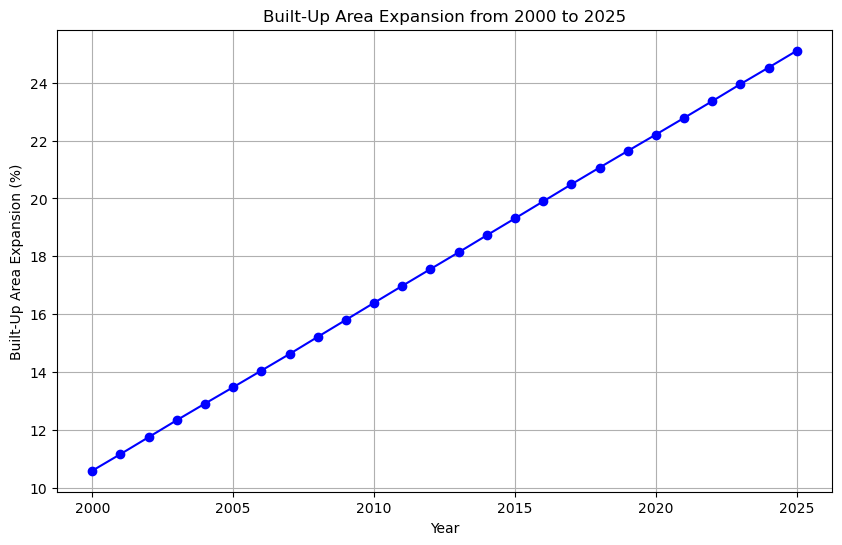

                            OLS Regression Results                            
Dep. Variable:     Built_Up_Expansion   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                 -0.115
Method:                 Least Squares   F-statistic:                    0.4862
Date:                Fri, 13 Jun 2025   Prob (F-statistic):              0.782
Time:                        09:16:32   Log-Likelihood:                -73.702
No. Observations:                  26   AIC:                             159.4
Df Residuals:                      20   BIC:                             167.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 1: Generate Synthetic Data
np.random.seed(42)  # For reproducibility

# Years from 2000 to 2025
years = np.arange(2000, 2026)

# Simulating the data for the variables
population_growth_rate = np.random.uniform(2, 3, len(years))  # Random values between 2% and 3% annual growth
urbanization_rate = np.random.uniform(1, 2, len(years))  # 1-2% growth in urban population
gdp_growth_rate = np.random.uniform(3, 5, len(years))  # 3-5% annual GDP growth
infrastructure_development_index = np.random.uniform(50, 80, len(years))  # Infrastructure index from 50 to 80
policy_support_index = np.random.uniform(60, 90, len(years))  # Policy support index from 60 to 90

# Generating built-up area expansion as dependent variable
# Using a base value of 10% in 2000 and simulating growth using these factors
base_built_up_expansion = 10  # Base built-up area in 2000
expansion_growth = 0.5 + (population_growth_rate * 0.1 + urbanization_rate * 0.2 + 
                          gdp_growth_rate * 0.15 + infrastructure_development_index * 0.05 + 
                          policy_support_index * 0.05) * 0.01  # Growth factor

built_up_expansion = base_built_up_expansion + np.cumsum(expansion_growth)  # Cumulative growth

# Creating a DataFrame with all the data
data = pd.DataFrame({
    'Year': years,
    'Built_Up_Expansion': built_up_expansion,
    'Population_Growth_Rate': population_growth_rate,
    'Urbanization_Rate': urbanization_rate,
    'GDP_Growth_Rate': gdp_growth_rate,
    'Infrastructure_Development_Index': infrastructure_development_index,
    'Policy_Support_Index': policy_support_index
})

# Step 2: Exploratory Data Analysis (EDA)
print(data.head())

# Plotting the built-up expansion over time
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Built_Up_Expansion'], marker='o', linestyle='-', color='b')
plt.title("Built-Up Area Expansion from 2000 to 2025")
plt.xlabel("Year")
plt.ylabel("Built-Up Area Expansion (%)")
plt.grid(True)
plt.show()

# Step 3: Multiple Linear Regression
X = data[['Population_Growth_Rate', 'Urbanization_Rate', 'GDP_Growth_Rate', 
          'Infrastructure_Development_Index', 'Policy_Support_Index']]
y = data['Built_Up_Expansion']

# Adding constant (intercept) to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Step 4: Summary of the model
print(model.summary())



In [2]:
# Step 1: Extract model coefficients
coefficients = model.params

# Step 2: Build the regression formula as a string
formula = f"Built_Up_Expansion = {coefficients['const']:.4f}"
for var in coefficients.index[1:]:
    formula += f" + ({coefficients[var]:.4f} * {var})"

# Step 3: Print the final regression formula
print("\nMultiple Linear Regression Formula:\n")
print(formula)



Multiple Linear Regression Formula:

Built_Up_Expansion = 24.1885 + (-4.3159 * Population_Growth_Rate) + (4.2365 * Urbanization_Rate) + (-0.5520 * GDP_Growth_Rate) + (-0.0787 * Infrastructure_Development_Index) + (0.0688 * Policy_Support_Index)


In [3]:
with open("regression_formula.txt", "w") as f:
    f.write("Multiple Linear Regression Formula:\n")
    f.write(formula)


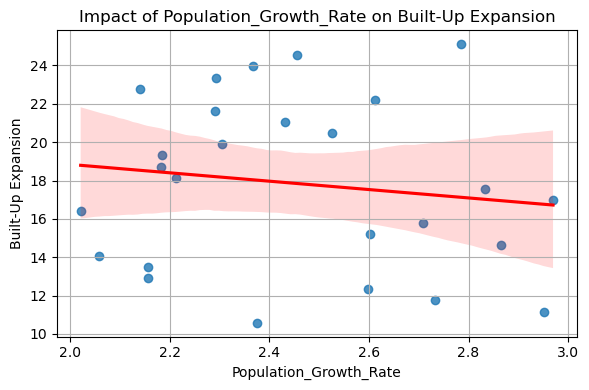

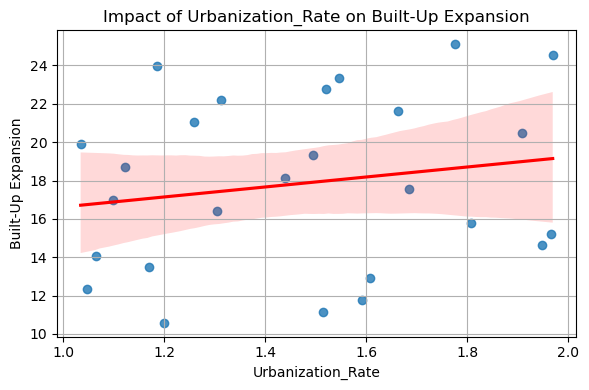

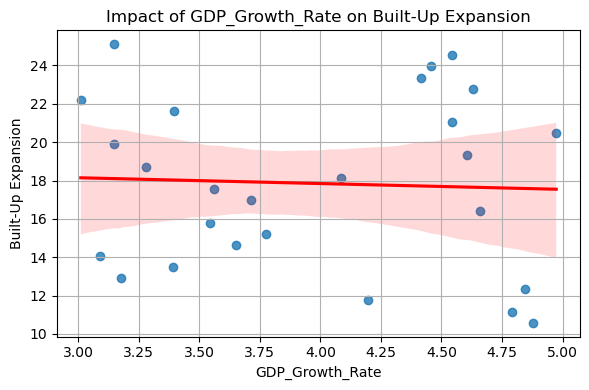

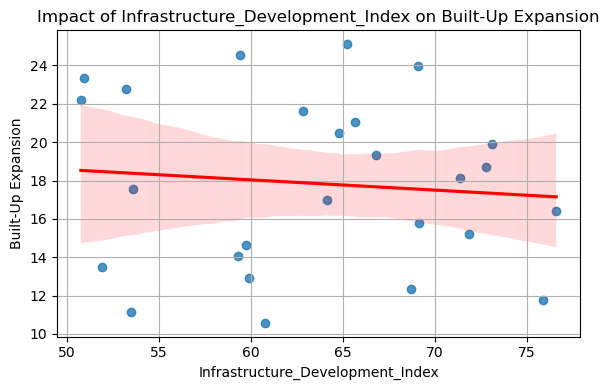

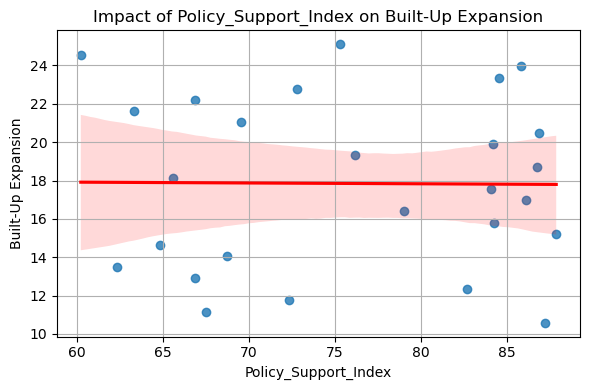

In [4]:
import seaborn as sns

# Create scatterplots with regression lines for each independent variable
variables = ['Population_Growth_Rate', 'Urbanization_Rate', 'GDP_Growth_Rate',
             'Infrastructure_Development_Index', 'Policy_Support_Index']

for var in variables:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=var, y='Built_Up_Expansion', data=data, line_kws={"color":"red"})
    plt.title(f'Impact of {var} on Built-Up Expansion')
    plt.xlabel(var)
    plt.ylabel('Built-Up Expansion')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


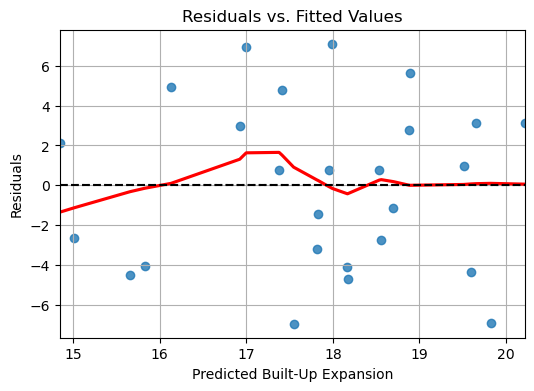

In [5]:
# Predicted vs. Actual
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(6, 4))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Predicted Built-Up Expansion')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()


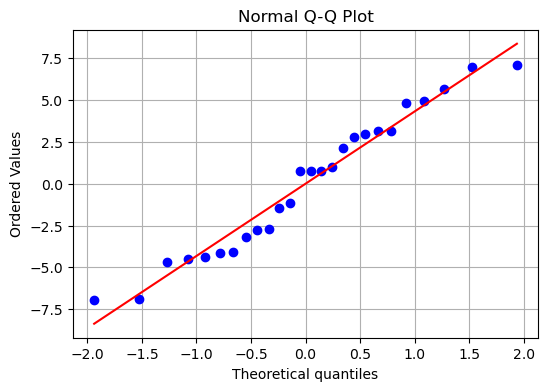

In [6]:
import scipy.stats as stats

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.grid(True)
plt.show()


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop intercept for VIF
X_vif = X.drop(columns='const')
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factors:\n")
print(vif_data)



Variance Inflation Factors:

                            Feature        VIF
0            Population_Growth_Rate  72.107321
1                 Urbanization_Rate  28.772381
2                   GDP_Growth_Rate  36.235443
3  Infrastructure_Development_Index  62.409749
4              Policy_Support_Index  84.066302



Predicted Built-Up Area Expansion (2026–2030):

   Year  Predicted_Built_Up_Expansion
0  2026                     19.366332
1  2027                     19.727108
2  2028                     20.665388
3  2029                     19.660130
4  2030                     20.921676


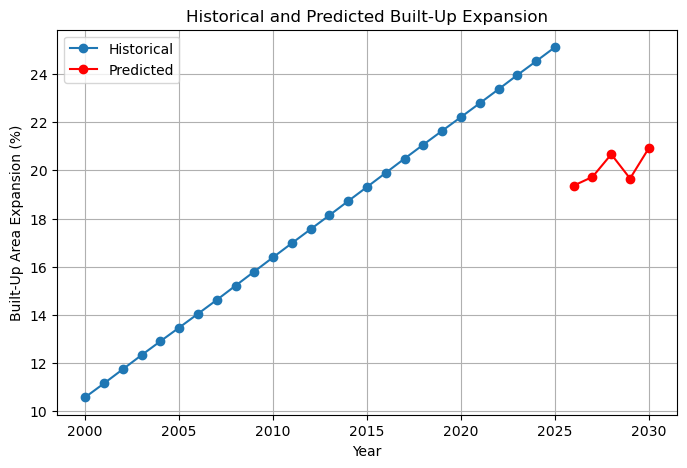

In [8]:
# Simulate new data for 2026–2030
future_years = np.arange(2026, 2031)
future_data = pd.DataFrame({
    'Population_Growth_Rate': np.random.uniform(2.2, 2.8, len(future_years)),
    'Urbanization_Rate': np.random.uniform(1.5, 2.5, len(future_years)),
    'GDP_Growth_Rate': np.random.uniform(3.5, 4.5, len(future_years)),
    'Infrastructure_Development_Index': np.random.uniform(75, 90, len(future_years)),
    'Policy_Support_Index': np.random.uniform(80, 95, len(future_years))
})
future_data = sm.add_constant(future_data)

# Predict future expansion
future_predictions = model.predict(future_data)

# Combine with years
predicted_df = pd.DataFrame({
    'Year': future_years,
    'Predicted_Built_Up_Expansion': future_predictions
})
print("\nPredicted Built-Up Area Expansion (2026–2030):\n")
print(predicted_df)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(data['Year'], data['Built_Up_Expansion'], label='Historical', marker='o')
plt.plot(predicted_df['Year'], predicted_df['Predicted_Built_Up_Expansion'], label='Predicted', marker='o', color='red')
plt.title('Historical and Predicted Built-Up Expansion')
plt.xlabel('Year')
plt.ylabel('Built-Up Area Expansion (%)')
plt.legend()
plt.grid(True)
plt.show()
